In [2]:
from LIMxCMBL.cross_spectrum import *
from LIMxCMBL.init import *
from LIMxCMBL.kernels import get_f_Kkappa, get_f_KI, get_f_KILo, apply_window

In [3]:
Lambdas = np.logspace(-5, 0, 50)
chis_resample_len = int(np.log2(len(chis_resample)))

In [9]:
import matplotlib.colors as colors


[5.55218084e-08 3.18948507e-07 1.83221968e-06]


/share/software/user/open/py-jupyter/1.0.0_py39/lib/python3.9/site-packages/IPython/core/pylabtools.py:134: UserWarning: Casting input data from float128 to float64 for imshow.
  fig.canvas.print_figure(bytes_io, **kw)


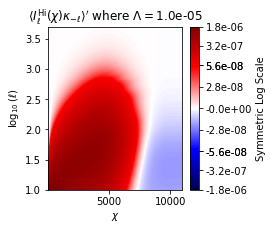

[5.24617028e-08 3.01369538e-07 1.73123619e-06]


/share/software/user/open/py-jupyter/1.0.0_py39/lib/python3.9/site-packages/IPython/core/pylabtools.py:134: UserWarning: Casting input data from float128 to float64 for imshow.
  fig.canvas.print_figure(bytes_io, **kw)


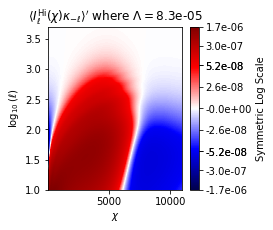

[4.61685567e-08 2.65218166e-07 1.52356237e-06]


/share/software/user/open/py-jupyter/1.0.0_py39/lib/python3.9/site-packages/IPython/core/pylabtools.py:134: UserWarning: Casting input data from float128 to float64 for imshow.
  fig.canvas.print_figure(bytes_io, **kw)


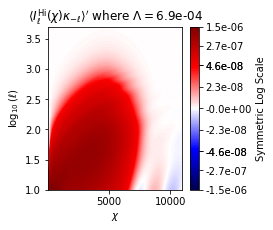

skipping Lambda 5.7e-03
[3.86398104e-08 2.21968811e-07 1.27511374e-06]


/share/software/user/open/py-jupyter/1.0.0_py39/lib/python3.9/site-packages/IPython/core/pylabtools.py:134: UserWarning: Casting input data from float128 to float64 for imshow.
  fig.canvas.print_figure(bytes_io, **kw)


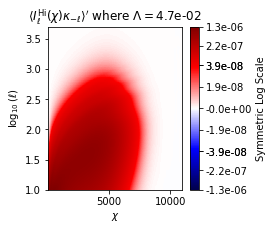

[3.86244661e-08 2.21880665e-07 1.27460738e-06]


/share/software/user/open/py-jupyter/1.0.0_py39/lib/python3.9/site-packages/IPython/core/pylabtools.py:134: UserWarning: Casting input data from float128 to float64 for imshow.
  fig.canvas.print_figure(bytes_io, **kw)


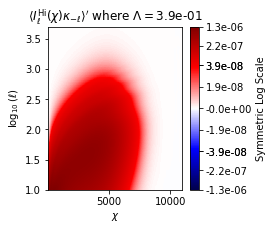

In [14]:
i = -1
for Lambda in Lambdas:
    i += 1
    if(i % 9 != 0):
        continue
    try: 
        oup_fname = '/scratch/users/delon/LIMxCMBL/IHiKappa/Lambda_%.5f_chi_sample_2e%d.npy'%(Lambda,chis_resample_len)
        IHi_kappa = np.load(oup_fname)
        

        vminmax = np.max(np.abs(IHi_kappa))
        plt.figure(figsize=(3,3), facecolor='w',)

        log_ymin = np.log10(ells[0])
        log_ymax = np.log10(ells[-1])

        lin_factor = 33
        linthresh = vminmax/lin_factor
        norm = colors.SymLogNorm(linthresh=linthresh, 
                                 linscale = np.log10(lin_factor),
                                 vmin=-vminmax, 
                                 vmax=vminmax, 
                                 base=10)

        # plot data
        im = plt.imshow(IHi_kappa, 
                        origin='lower',
                        cmap='seismic',
                        norm=norm,
                        aspect='auto',
                        extent=[chibs[0], chibs[-1], log_ymin, log_ymax])

        tick_locations = np.logspace(np.log10(linthresh), np.log10(vminmax), 3)
        print(tick_locations)
        tick_locations = np.concatenate((np.linspace(0, linthresh, 3), tick_locations))
        tick_locations = np.unique(np.concatenate((-tick_locations, tick_locations)))

        cbar = plt.colorbar(im, ticks=tick_locations)
        cbar.ax.minorticks_off()
        cbar.ax.set_yticklabels([f'{x:.1e}' for x in tick_locations])
        cbar.ax.set_ylabel('Symmetric Log Scale')



        # set bounds
        plt.title(r"$\langle I_{ \ell}^{\sf Hi}(\chi) \kappa_{- \ell}\rangle'$ where $\Lambda = $%.1e"%(Lambda))

        plt.xlabel(r'$\chi$')
        plt.ylabel(r"$\log_{10}(\ell)$")

        plt.show()
        
        
    except:
        print('skipping Lambda %.1e'%Lambda)

In [15]:
IHi_kappa.shape

(100, 8192)

In [23]:
rainbow_colors = plt.cm.rainbow(np.linspace(0, 1, 5))
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=rainbow_colors[::-1])

In [32]:
(np.log10(1e-5) + 10) / 10

0.5

In [31]:
(np.log10(1e-0) + 10) / 10

1.0

In [34]:
(np.log10(Lambdas) + 10) / 10

array([0.5       , 0.51020408, 0.52040816, 0.53061224, 0.54081633,
       0.55102041, 0.56122449, 0.57142857, 0.58163265, 0.59183673,
       0.60204082, 0.6122449 , 0.62244898, 0.63265306, 0.64285714,
       0.65306122, 0.66326531, 0.67346939, 0.68367347, 0.69387755,
       0.70408163, 0.71428571, 0.7244898 , 0.73469388, 0.74489796,
       0.75510204, 0.76530612, 0.7755102 , 0.78571429, 0.79591837,
       0.80612245, 0.81632653, 0.82653061, 0.83673469, 0.84693878,
       0.85714286, 0.86734694, 0.87755102, 0.8877551 , 0.89795918,
       0.90816327, 0.91836735, 0.92857143, 0.93877551, 0.94897959,
       0.95918367, 0.96938776, 0.97959184, 0.98979592, 1.        ])

skipping Lambda 1.7e-04
skipping Lambda 2.1e-04
skipping Lambda 5.7e-03


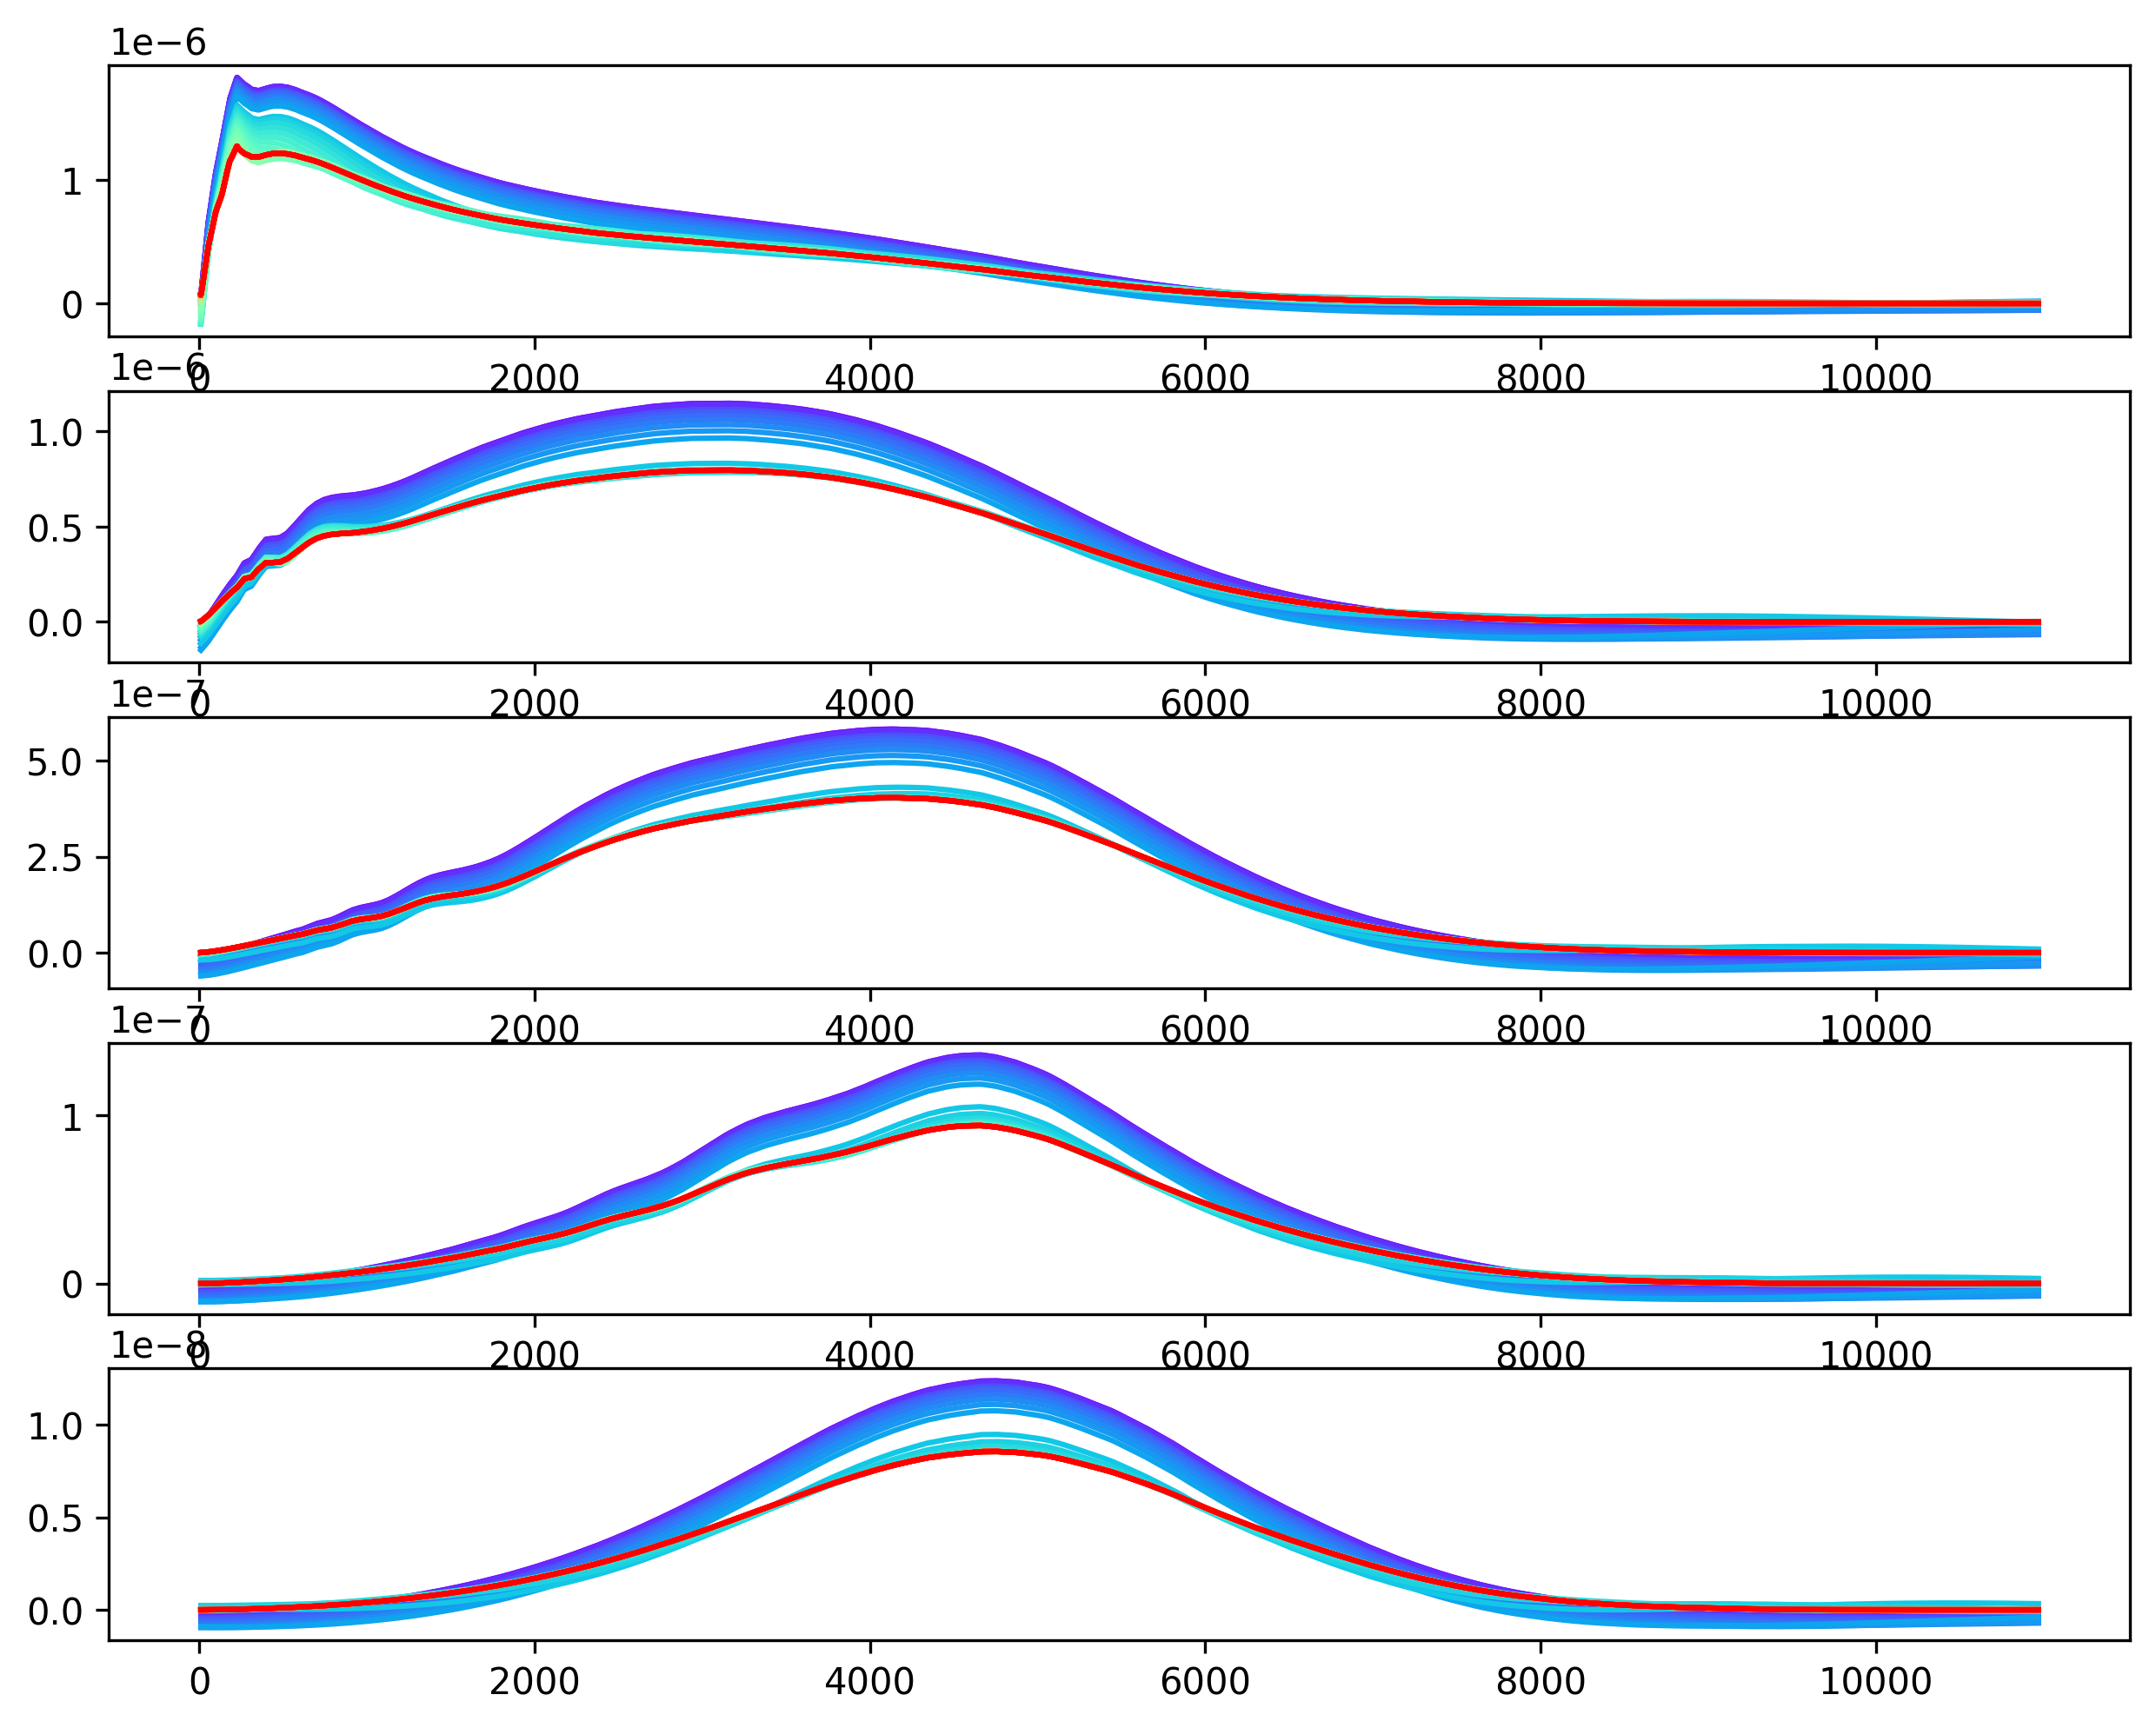

In [44]:
fig,axs = plt.subplots(nrows = 5, ncols = 1, dpi = 300, figsize = (10, 8))
color = dict(zip(Lambdas, plt.cm.rainbow(np.linspace(0, 1, len(Lambdas)))))
for Lambda in Lambdas:
    try: 
        oup_fname = '/scratch/users/delon/LIMxCMBL/IHiKappa/Lambda_%.5f_chi_sample_2e%d.npy'%(Lambda,chis_resample_len)
        IHi_kappa = np.load(oup_fname)
        axs[0].plot(chis_resample, IHi_kappa[0], c = color[Lambda])
        axs[1].plot(chis_resample, IHi_kappa[20], c = color[Lambda])
        axs[2].plot(chis_resample, IHi_kappa[40], c = color[Lambda])
        axs[3].plot(chis_resample, IHi_kappa[60], c = color[Lambda])
        axs[4].plot(chis_resample, IHi_kappa[80], c = color[Lambda])
    except:
        print('skipping Lambda %.1e'%Lambda)

skipping Lambda 1.7e-04
skipping Lambda 2.1e-04
skipping Lambda 5.7e-03


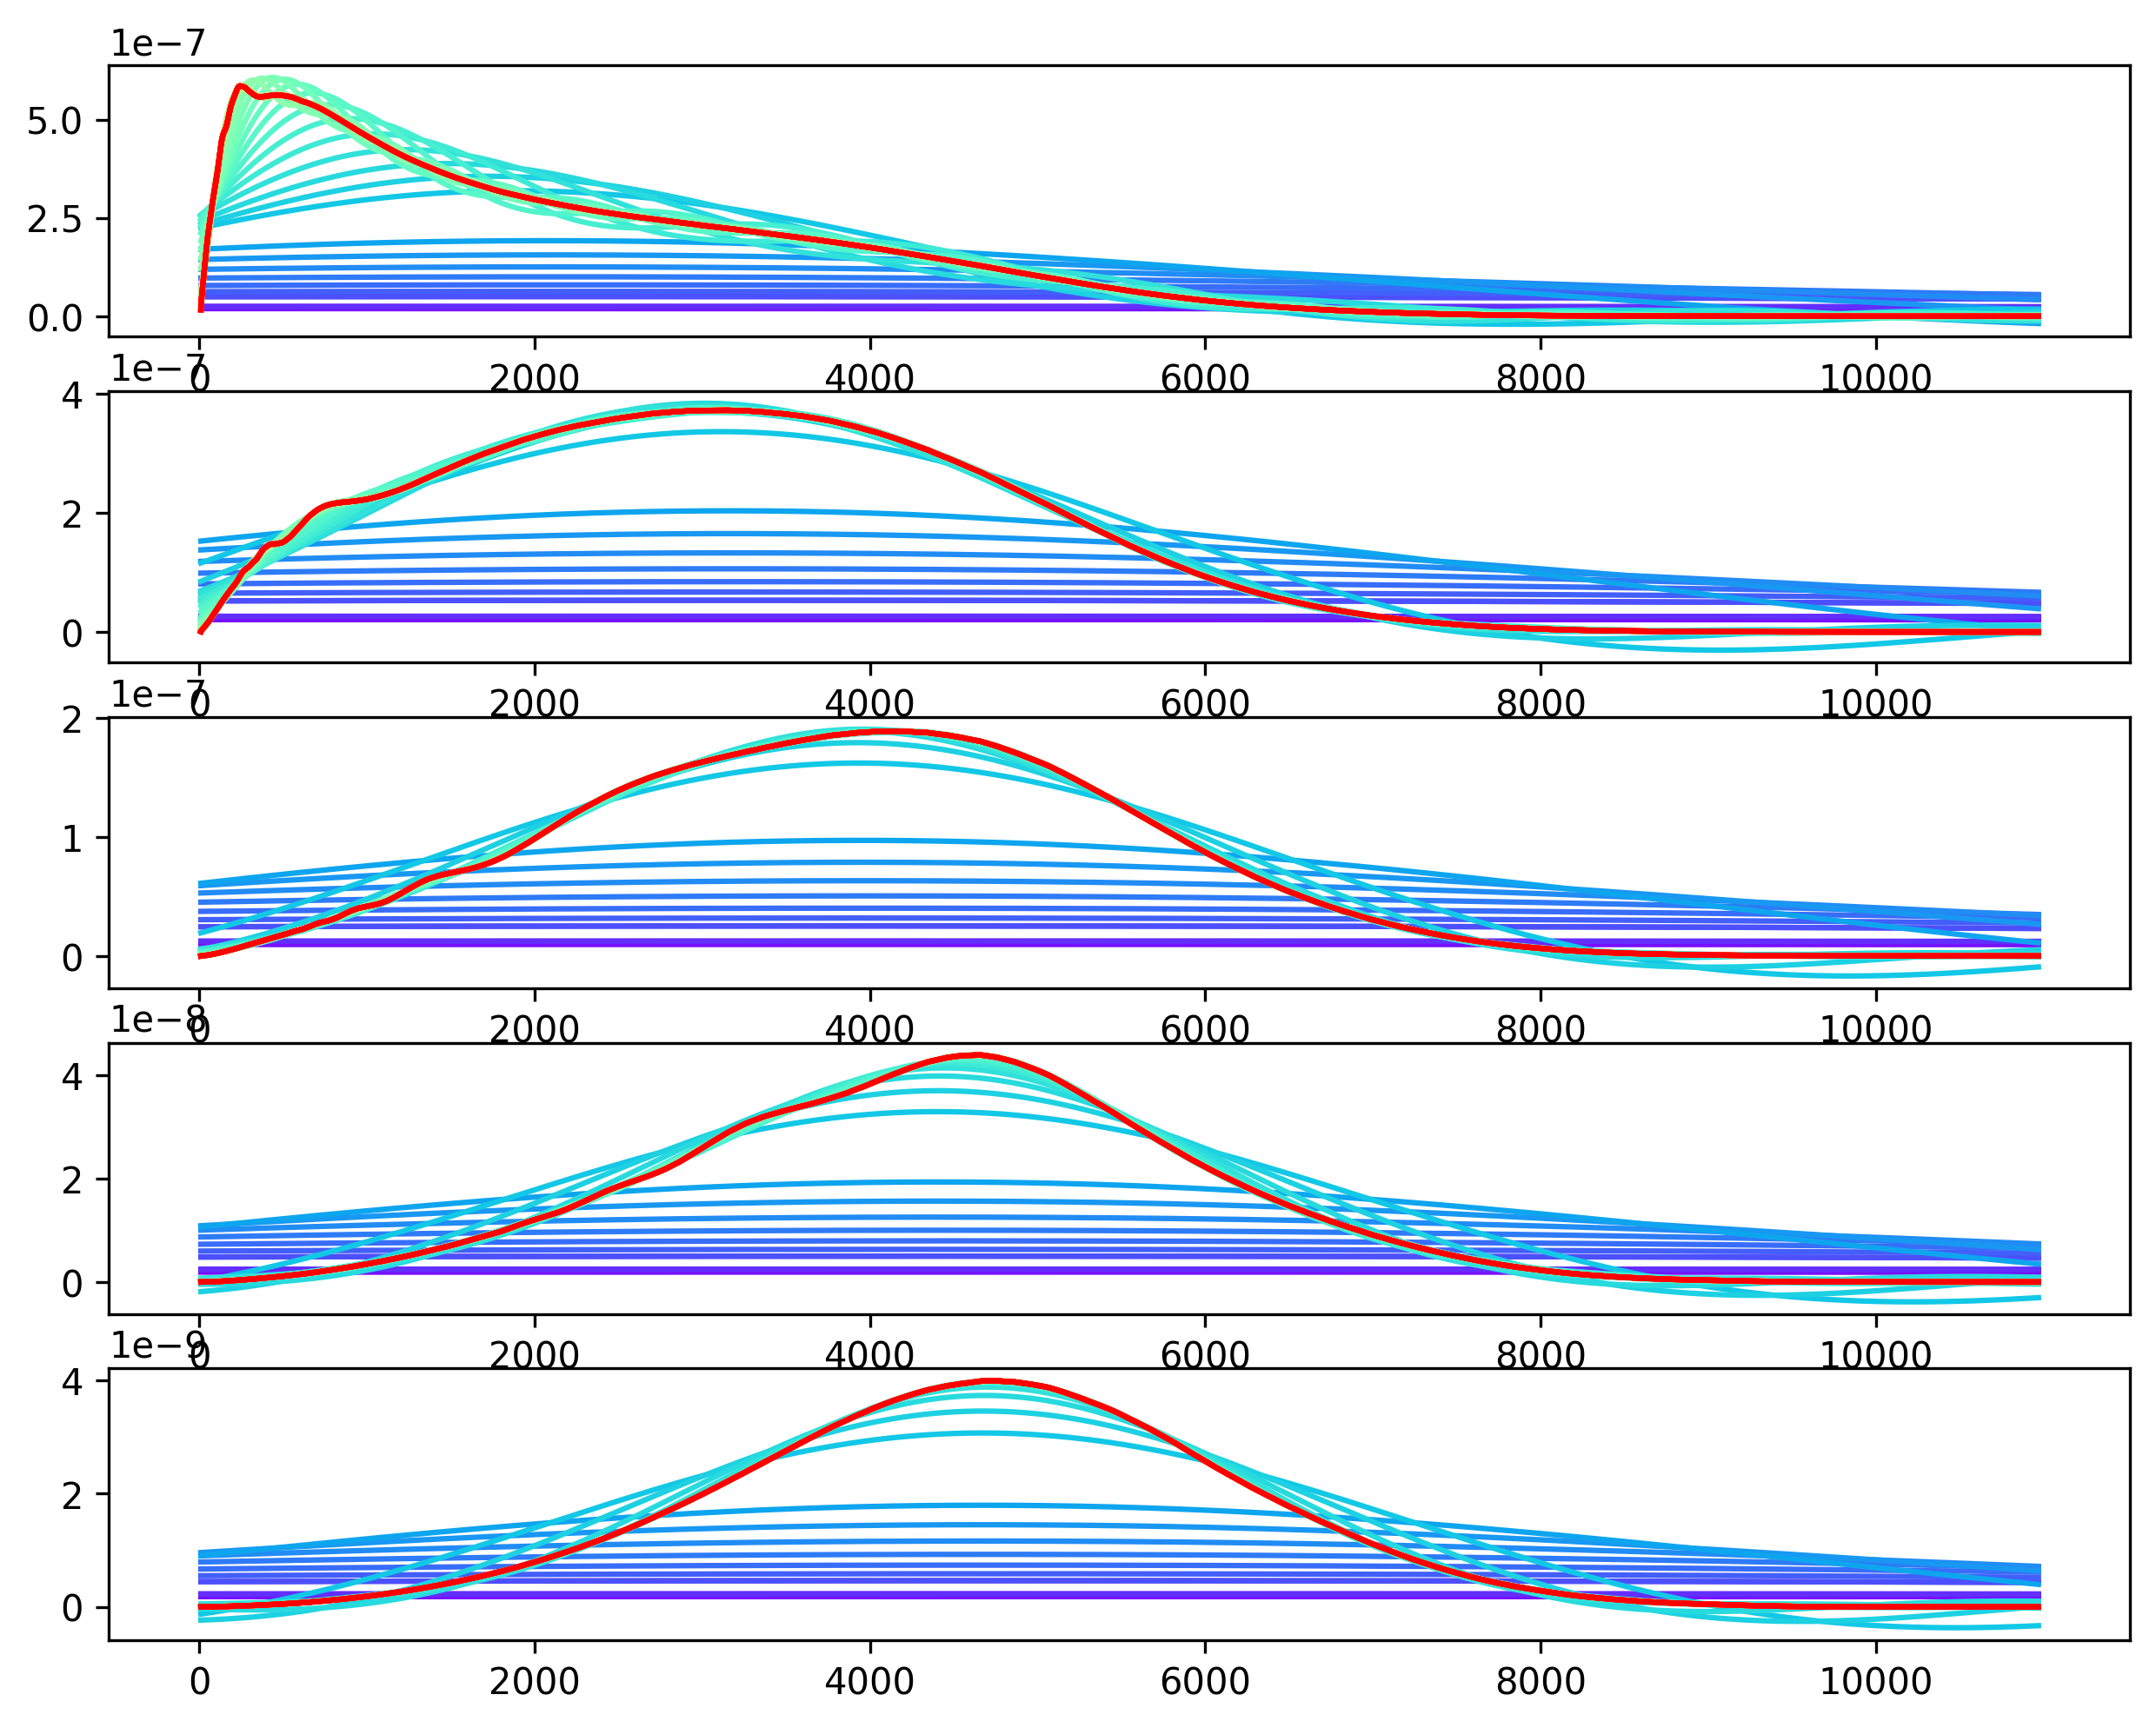

In [47]:
fig,axs = plt.subplots(nrows = 5, ncols = 1, dpi = 300, figsize = (10, 8))
color = dict(zip(Lambdas, plt.cm.rainbow(np.linspace(0, 1, len(Lambdas)))))
for Lambda in Lambdas:
    try: 
        oup_fname = '/scratch/users/delon/LIMxCMBL/IHiKappa/ILoKappa/Lambda_%.5f.npy'%(Lambda)
        IHi_kappa = np.load(oup_fname)
        axs[0].plot(chis_resample, IHi_kappa[0], c = color[Lambda])
        axs[1].plot(chis_resample, IHi_kappa[20], c = color[Lambda])
        axs[2].plot(chis_resample, IHi_kappa[40], c = color[Lambda])
        axs[3].plot(chis_resample, IHi_kappa[60], c = color[Lambda])
        axs[4].plot(chis_resample, IHi_kappa[80], c = color[Lambda])
    except:
        print('skipping Lambda %.1e'%Lambda)